In [3]:
import tensorflow as tf
import keras 
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


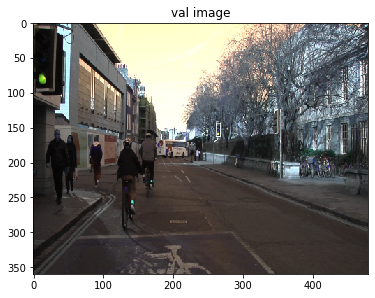

In [5]:
img = "/content/drive/My Drive/HCI_prep/dataset1/val.png"
import cv2, os
import numpy as np
img_is = cv2.imread(img )
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.imshow(img_is)
ax.set_title("val image")
plt.show()


In [23]:
height, width = 224, 224
img_resized = np.array(cv2.resize(img_is, (width, height))) / 127.5 - 1
print(img_resized.shape)
img_resized= img_resized.reshape(-1,224,224,3)
print(img_resized.shape)

(224, 224, 3)
(1, 224, 224, 3)


In [24]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/My Drive/HCI_prep/fcn_8_model.h5')
print(model.summary())


Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]               
____________________________________________________________________________________________

(224, 224, 12)
(224, 224)
[[1 1 1 ... 5 1 5]
 [1 1 1 ... 5 5 5]
 [1 1 1 ... 5 5 5]
 ...
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]]


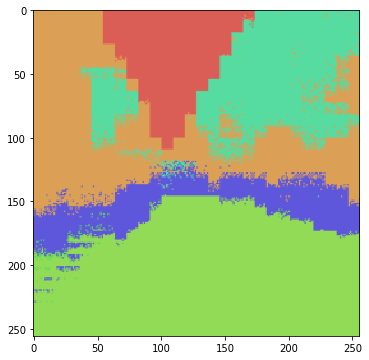

In [49]:
n_classes=12
im_pred= model.predict(img_resized)[0]
#print(im_pred)
#im_pred= np.array(im_pred)
print(im_pred.shape)
pr = im_pred.reshape(height,  width, n_classes).argmax(axis=2)
print(pr.shape)
seg_img = np.zeros((height, width, 3))
import seaborn as sns
colors = sns.color_palette("hls", n_classes)

print(pr[:,:])
for c in range(n_classes):
        segc = (pr[:,:] == c)
        seg_img[:, :, 0] += (segc * (colors[c][0]))
        seg_img[:, :, 1] += (segc * (colors[c][1]))
        seg_img[:, :, 2] += (segc * (colors[c][2]))
seg_img = cv2.resize(seg_img , (256, 256))

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(seg_img)
